In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
fname = '50MHz_25MHzcrystal.csv'
with open(fname, 'r') as rfp:
    rfp.readline()
    parameters = rfp.readline()
parameters = parameters.strip('\n').split(',')[:-1]
dt = float(parameters[-1])
print(dt)

5e-11


In [14]:
df = pd.read_csv(fname, skiprows=2, header=None, usecols = [0,1], names = ['X', 'CH1'])

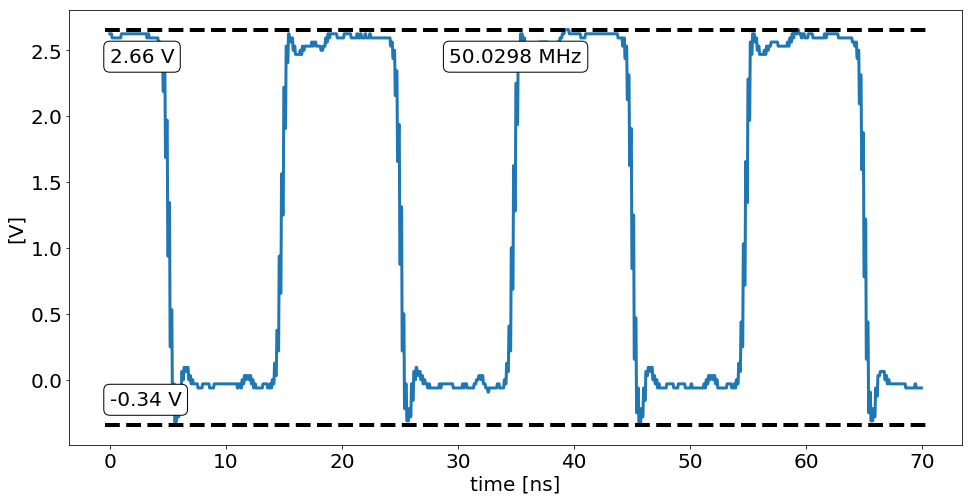

In [96]:
fs = 20
conv = 1e9
props = dict(boxstyle='round', facecolor = 'white')

fig, ax = plt.subplots(figsize = (16,8))
ax.plot(df.X*dt*conv, df.CH1, lw = 3)
ax.axhline(df.CH1.max(), xmin = 0.04, xmax = 0.96, lw = 4, color = 'k', linestyle = '--')
ax.axhline(df.CH1.min(), xmin = 0.04, xmax = 0.96, lw = 4, color = 'k', linestyle = '--')
ax.text(0,0.95*df.CH1.max(), '{0:.2f} V'.format(np.round(df.CH1.max(),2)), verticalalignment = 'top', fontsize = fs,
       bbox = props)
ax.text(0,-0.08, '{0:.2f} V'.format(np.round(df.CH1.min(),2)), verticalalignment = 'top', fontsize = fs,
       bbox = props)
ax.text(df.X.mean()*dt*conv,0.95*df.CH1.max(), '50.0298 MHz', verticalalignment = 'top', fontsize = fs,
        horizontalalignment = 'center', bbox = props)
ax.tick_params(labelsize = fs)
ax.set_xlabel('time [ns]', fontsize = fs)
ax.set_ylabel('[V]', fontsize = fs);
fig.savefig('50MHz_25MHzcrystal.png', dpi = 300)